## Data information：

The data we use is from "OperationalData" folder with dataset name ends with "SEN_Hk_tlm_t.csv". Some data samples are selected and saved in the "data" folder. We are gonna use these 16 datasets to explore data preprocessing and data modeling. 

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
pd.set_option('display.max_columns', None)
from mpl_toolkits import mplot3d

Get user input for the start date. The next 7 day's data will be read and move to the temp folder. 7 can also be set as configurable if needed.

In [2]:
import calendar
import tkinter
import datetime

def validate(date_text):
    try:
        return datetime.datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        return False

startDate = input('Please input the start date you want to do the analyze in format YYYY-MM-DD: \n')
vresult = validate(startDate)
while not vresult :
    startDate = input('Invalid date. Please input the start date you want to do the analyze in format YYYY-MM-DD: \n')
    vresult = validate(startDate)


Please input the start date you want to do the analyze in format YYYY-MM-DD: 
2021-02-29
Invalid date. Please input the start date you want to do the analyze in format YYYY-MM-DD: 
12312314
Invalid date. Please input the start date you want to do the analyze in format YYYY-MM-DD: 
2020-05-28


## Step 1: Add a column with file name.

The csv files are located in seperate folders, whose name is in format "YYYY_MM_DD", in the "data" folder under the root directory. All "SEN_Hk_tlm_t" files will be regenerated in the "data_updated" folder under the root directory with new column "filename".

In [3]:
dayrange = 7

dayarray = []
day = 0
while day < dayrange:
    dayarray.append((vresult + datetime.timedelta(days=day)).strftime("%Y_%m_%d"))
    day += 1

print(dayarray)

indir = "OperationalData"
outdir = 'data_updated/data'
if not os.path.exists(outdir):
    os.mkdir(outdir)

for i in range(0,dayrange):
    filepath = indir + "/" + dayarray[i] + "/*.csv"
    temp_globbed_files = glob.glob(filepath) 
    requiredFile = "SEN_Hk_tlm_t"
    for csv in temp_globbed_files:
        currentFileName = os.path.basename(csv)
        if(requiredFile in currentFileName):           
            print(currentFileName)
            frame = pd.read_csv(csv)
            frame = frame.iloc[:, :-1]
            frame['filename'] = currentFileName
            frame.to_csv(outdir + "/" + currentFileName, index = False)

['2020_05_28', '2020_05_29', '2020_05_30', '2020_05_31', '2020_06_01', '2020_06_02', '2020_06_03']
2020_05_28_09_56_41_SEN_Hk_tlm_t.csv
2020_05_28_20_19_06-SEN_Hk_tlm_t.csv
2020_05_29_07_48_07-SEN_Hk_tlm_t.csv
2020_06_01_08_27_17-SEN_Hk_tlm_t.csv
2020_06_03_08_03_19_SEN_Hk_tlm_t.csv


## Step 2: Import all the dataset and concat them.

In [96]:
folder_name = 'data_updated/data'
file_type = 'csv'
seperator =','
dataframe = pd.concat([pd.read_csv(f, sep=seperator) for f in glob.glob(folder_name + "/*."+file_type)],ignore_index=True)


In [97]:
print("The data contains " + str(dataframe.shape[0]) + " rows and " + str(dataframe.shape[1]) + " columns" )


The data contains 197830 rows and 30 columns


In [98]:
dataframe.head()

TARGET        PACKET  STF1_SCID  STF1_FIFO  CCSDS_PKT_VER  CCSDS_PKT_TYP  \
0  STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0            0.0   
1  STF1_TLM  SEN_HK_TLM_T       53.0       73.0            0.0            0.0   
2  STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0            0.0   
3  STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0            0.0   
4  STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0            0.0   

   CCSDS_SEC_FLG  CCSDS_APID  CCSDS_SEQ_FLAGS  CCSDS_SEQ_COUNT  CCSDS_LENGTH  \
0            1.0       120.0              3.0           8292.0          39.0   
1            1.0       120.0              3.0           9317.0          39.0   
2            1.0       120.0              3.0           8297.0          39.0   
3            1.0       120.0              3.0           8299.0          39.0   
4            1.0       120.0              3.0           8302.0          39.0   

   CCSDS_SECONDS  CCSDS_SUBSECS  CMD_COUNT  CMD_ERROR_COUNT  TEMP_0  TEMP_1  \
0      1149481.0        50192.0        0.0              0.0   158.0   163.0   
1      1411603.0        40328.0        0.0              0.0   158.0   163.0   
2      1411643.0        40328.0        0.0              0.0   159.0   165.0   
3      1411663.0        40435.0        0.0              0.0   160.0   165.0   
4      1411693.0        40432.0        0.0              0.0   161.0   166.0   

        MAG_0      MAG_1       MAG_2    GYRO_0     GYRO_1    GYRO_2  \
0 -177.692307  26.985577  223.846161 -4.903846  28.887362 -1.579670   
1   78.461540  49.230770  270.000000 -4.629121  28.901106 -1.504121   
2 -239.230774  30.000000  169.230774 -4.478022  28.907967 -1.559066   
3  215.384613  78.461540  160.000000 -4.862637  28.859888 -1.531593   
4 -273.076935  31.538462   79.226624 -4.924450  28.887362 -1.579670   

   GYRO_TEMP                              filename RECEIVED_TIMEFORMATTED  \
0  17.250587  2020_05_28_08_22_27_SEN_Hk_tlm_t.csv                    NaN   
1  17.282942  2020_05_28_08_22_27_SEN_Hk_tlm_t.csv                    NaN   
2  17.287354  2020_05_28_08_22_27_SEN_Hk_tlm_t.csv                    NaN   
3  17.456470  2020_05_28_08_22_27_SEN_Hk_tlm_t.csv                    NaN   
4  17.553530  2020_05_28_08_22_27_SEN_Hk_tlm_t.csv                    NaN   

   RECEIVED_TIMESECONDS  RECEIVED_COUNT CCSDS_SECONDS_SUBSECS  cdsec  
0                   NaN             NaN                   NaN    NaN  
1                   NaN             NaN                   NaN    NaN  
2                   NaN             NaN                   NaN    NaN  
3                   NaN             NaN                   NaN    NaN  
4                   NaN             NaN                   NaN    NaN

In [99]:
dataframe.shape

(197830, 30)

## Step 3: Clean the data

#### find all the rows that contains NaN values


In [100]:
NaN_rows = dataframe[dataframe.isna().any(axis=1)]
NaN_rows.head()

TARGET        PACKET  STF1_SCID  STF1_FIFO  CCSDS_PKT_VER  CCSDS_PKT_TYP  \
0  STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0            0.0   
1  STF1_TLM  SEN_HK_TLM_T       53.0       73.0            0.0            0.0   
2  STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0            0.0   
3  STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0            0.0   
4  STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0            0.0   

   CCSDS_SEC_FLG  CCSDS_APID  CCSDS_SEQ_FLAGS  CCSDS_SEQ_COUNT  CCSDS_LENGTH  \
0            1.0       120.0              3.0           8292.0          39.0   
1            1.0       120.0              3.0           9317.0          39.0   
2            1.0       120.0              3.0           8297.0          39.0   
3            1.0       120.0              3.0           8299.0          39.0   
4            1.0       120.0              3.0           8302.0          39.0   

   CCSDS_SECONDS  CCSDS_SUBSECS  CMD_COUNT  CMD_ERROR_COUNT  TEMP_0  TEMP_1  \
0      1149481.0        50192.0        0.0              0.0   158.0   163.0   
1      1411603.0        40328.0        0.0              0.0   158.0   163.0   
2      1411643.0        40328.0        0.0              0.0   159.0   165.0   
3      1411663.0        40435.0        0.0              0.0   160.0   165.0   
4      1411693.0        40432.0        0.0              0.0   161.0   166.0   

        MAG_0      MAG_1       MAG_2    GYRO_0     GYRO_1    GYRO_2  \
0 -177.692307  26.985577  223.846161 -4.903846  28.887362 -1.579670   
1   78.461540  49.230770  270.000000 -4.629121  28.901106 -1.504121   
2 -239.230774  30.000000  169.230774 -4.478022  28.907967 -1.559066   
3  215.384613  78.461540  160.000000 -4.862637  28.859888 -1.531593   
4 -273.076935  31.538462   79.226624 -4.924450  28.887362 -1.579670   

   GYRO_TEMP                              filename RECEIVED_TIMEFORMATTED  \
0  17.250587  2020_05_28_08_22_27_SEN_Hk_tlm_t.csv                    NaN   
1  17.282942  2020_05_28_08_22_27_SEN_Hk_tlm_t.csv                    NaN   
2  17.287354  2020_05_28_08_22_27_SEN_Hk_tlm_t.csv                    NaN   
3  17.456470  2020_05_28_08_22_27_SEN_Hk_tlm_t.csv                    NaN   
4  17.553530  2020_05_28_08_22_27_SEN_Hk_tlm_t.csv                    NaN   

   RECEIVED_TIMESECONDS  RECEIVED_COUNT CCSDS_SECONDS_SUBSECS  cdsec  
0                   NaN             NaN                   NaN    NaN  
1                   NaN             NaN                   NaN    NaN  
2                   NaN             NaN                   NaN    NaN  
3                   NaN             NaN                   NaN    NaN  
4                   NaN             NaN                   NaN    NaN

In [101]:

print("There are " + str(NaN_rows.shape[0]) + " rows that contains NaN values. By checking the original dataset we could see some of the data files don't have the 'TARGET' and 'PACKET' columns. So delete these two columns.")
      
      
      

There are 197830 rows that contains NaN values. By checking the original dataset we could see some of the data files don't have the 'TARGET' and 'PACKET' columns. So delete these two columns.


In [102]:
dataframe.pop("RECEIVED_TIMEFORMATTED")
dataframe.pop("RECEIVED_TIMESECONDS")
dataframe.pop("RECEIVED_COUNT")

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
197825   NaN
197826   NaN
197827   NaN
197828   NaN
197829   NaN
Name: RECEIVED_COUNT, Length: 197830, dtype: float64

#### Find all the rows that contains NaN values again.

In [103]:
NaN_rows2 = dataframe[dataframe.isna().any(axis=1)]

In [104]:
NaN_rows2

TARGET        PACKET  STF1_SCID  STF1_FIFO  CCSDS_PKT_VER  \
0       STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0   
1       STF1_TLM  SEN_HK_TLM_T       53.0       73.0            0.0   
2       STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0   
3       STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0   
4       STF1_TLM  SEN_HK_TLM_T       53.0       65.0            0.0   
...          ...           ...        ...        ...            ...   
197825       NaN           NaN        NaN        NaN            NaN   
197826       NaN           NaN        NaN        NaN            NaN   
197827       NaN           NaN        NaN        NaN            NaN   
197828       NaN           NaN        NaN        NaN            NaN   
197829       NaN           NaN        NaN        NaN            NaN   

        CCSDS_PKT_TYP  CCSDS_SEC_FLG  CCSDS_APID  CCSDS_SEQ_FLAGS  \
0                 0.0            1.0       120.0              3.0   
1                 0.0            1.0       120.0              3.0   
2                 0.0            1.0       120.0              3.0   
3                 0.0            1.0       120.0              3.0   
4                 0.0            1.0       120.0              3.0   
...               ...            ...         ...              ...   
197825            NaN            NaN         NaN              NaN   
197826            NaN            NaN         NaN              NaN   
197827            NaN            NaN         NaN              NaN   
197828            NaN            NaN         NaN              NaN   
197829            NaN            NaN         NaN              NaN   

        CCSDS_SEQ_COUNT  CCSDS_LENGTH  CCSDS_SECONDS  CCSDS_SUBSECS  \
0                8292.0          39.0      1149481.0        50192.0   
1                9317.0          39.0      1411603.0        40328.0   
2                8297.0          39.0      1411643.0        40328.0   
3                8299.0          39.0      1411663.0        40435.0   
4                8302.0          39.0      1411693.0        40432.0   
...                 ...           ...            ...            ...   
197825           5618.0           NaN      2531733.0        40537.0   
197826           5619.0           NaN      2531743.0        40537.0   
197827           5690.0           NaN      2532453.0        40328.0   
197828           5776.0           NaN      2533313.0        40595.0   
197829           5780.0           NaN      2533353.0        40537.0   

        CMD_COUNT  CMD_ERROR_COUNT  TEMP_0  TEMP_1       MAG_0       MAG_1  \
0             0.0              0.0   158.0   163.0 -177.692307   26.985577   
1             0.0              0.0   158.0   163.0   78.461540   49.230770   
2             0.0              0.0   159.0   165.0 -239.230774   30.000000   
3             0.0              0.0   160.0   165.0  215.384613   78.461540   
4             0.0              0.0   161.0   166.0 -273.076935   31.538462   
...           ...              ...     ...     ...         ...         ...   
197825        NaN              NaN   342.0   346.0 -220.769241  354.615387   
197826        NaN              NaN   342.0   346.0 -177.692307  360.769226   
197827        NaN              NaN   334.0   339.0  266.153839  299.230774   
197828        NaN              NaN   328.0   332.0  143.596161 -144.615387   
197829        NaN              NaN   327.0   332.0   41.538464 -146.153854   

             MAG_2    GYRO_0     GYRO_1    GYRO_2  GYRO_TEMP  \
0       223.846161 -4.903846  28.887362 -1.579670  17.250587   
1       270.000000 -4.629121  28.901106 -1.504121  17.282942   
2       169.230774 -4.478022  28.907967 -1.559066  17.287354   
3       160.000000 -4.862637  28.859888 -1.531593  17.456470   
4        79.226624 -4.924450  28.887362 -1.579670  17.553530   
...            ...       ...        ...       ...        ...   
197825 -114.615387 -5.714285  36.153843 -1.875000  35.565292   
197826 -141.538467 -5.7074

In [105]:
## Delete all the rows that contains NaN
dataframe_cleaned = dataframe.dropna()

In [106]:
dataframe_cleaned.shape

(0, 27)

In [107]:
NaN_rows3 = dataframe_cleaned[dataframe_cleaned.isna().any(axis=1)]

In [108]:
NaN_rows3

Empty DataFrame
Columns: [TARGET, PACKET, STF1_SCID, STF1_FIFO, CCSDS_PKT_VER, CCSDS_PKT_TYP, CCSDS_SEC_FLG, CCSDS_APID, CCSDS_SEQ_FLAGS, CCSDS_SEQ_COUNT, CCSDS_LENGTH, CCSDS_SECONDS, CCSDS_SUBSECS, CMD_COUNT, CMD_ERROR_COUNT, TEMP_0, TEMP_1, MAG_0, MAG_1, MAG_2, GYRO_0, GYRO_1, GYRO_2, GYRO_TEMP, filename, CCSDS_SECONDS_SUBSECS, cdsec]
Index: []

In [109]:
print("The row number now is " + str(dataframe_cleaned.shape[0]) )

The row number now is 0


In [110]:
print(str(dataframe.shape[0] - dataframe_cleaned.shape[0]) + " rows with NaN values are deleted.")

197830 rows with NaN values are deleted.


## Step 4: Delete Duplicates

Create a new column that concats the two columns "CCSDS_SECONDS" and "CCSDS_SUBSECS".

In [111]:
dataframe_cleaned["CCSDS_SECONDS_SUBSECS"] = dataframe_cleaned["CCSDS_SECONDS"].astype(str) +'-'+ dataframe_cleaned["CCSDS_SUBSECS"].astype(str)


In [112]:
dataframe_cleaned.head()

Empty DataFrame
Columns: [TARGET, PACKET, STF1_SCID, STF1_FIFO, CCSDS_PKT_VER, CCSDS_PKT_TYP, CCSDS_SEC_FLG, CCSDS_APID, CCSDS_SEQ_FLAGS, CCSDS_SEQ_COUNT, CCSDS_LENGTH, CCSDS_SECONDS, CCSDS_SUBSECS, CMD_COUNT, CMD_ERROR_COUNT, TEMP_0, TEMP_1, MAG_0, MAG_1, MAG_2, GYRO_0, GYRO_1, GYRO_2, GYRO_TEMP, filename, CCSDS_SECONDS_SUBSECS, cdsec]
Index: []

In [113]:
# shows rows with duplicated information
duplicateRowsDF = dataframe_cleaned[dataframe_cleaned.duplicated(['CCSDS_SECONDS_SUBSECS'])]

In [114]:
print("There are " + str(duplicateRowsDF.shape[0]) + " rows that contains duplicated information.")

There are 0 rows that contains duplicated information.


#### Below are some examples of duplicated rows.

In [115]:
duplicateRowsDF.loc[duplicateRowsDF['CCSDS_SECONDS_SUBSECS'] == duplicateRowsDF['CCSDS_SECONDS_SUBSECS'].tolist()[0]]

IndexError: list index out of range

In [ ]:
duplicateRowsDF.loc[duplicateRowsDF['CCSDS_SECONDS_SUBSECS'] == duplicateRowsDF['CCSDS_SECONDS_SUBSECS'].tolist()[1]]

In [ ]:
duplicateRowsDF.loc[duplicateRowsDF['CCSDS_SECONDS_SUBSECS'] == duplicateRowsDF['CCSDS_SECONDS_SUBSECS'].tolist()[2]]

In [ ]:
duplicateRowsDF.loc[duplicateRowsDF['CCSDS_SECONDS_SUBSECS'] == duplicateRowsDF['CCSDS_SECONDS_SUBSECS'].tolist()[3]]

In [ ]:
duplicateRowsDF.loc[duplicateRowsDF['CCSDS_SECONDS_SUBSECS'] == duplicateRowsDF['CCSDS_SECONDS_SUBSECS'].tolist()[4]]

In [ ]:
duplicateRowsDF.loc[duplicateRowsDF['CCSDS_SECONDS_SUBSECS'] == duplicateRowsDF['CCSDS_SECONDS_SUBSECS'].tolist()[5]]

In [ ]:
duplicateRowsDF.loc[duplicateRowsDF['CCSDS_SECONDS_SUBSECS'] == duplicateRowsDF['CCSDS_SECONDS_SUBSECS'].tolist()[6]]

In [ ]:
duplicateRowsDF.loc[duplicateRowsDF['CCSDS_SECONDS_SUBSECS'] == duplicateRowsDF['CCSDS_SECONDS_SUBSECS'].tolist()[7]]

In [ ]:
duplicateRowsDF.loc[duplicateRowsDF['CCSDS_SECONDS_SUBSECS'] == duplicateRowsDF['CCSDS_SECONDS_SUBSECS'].tolist()[8]]

In [ ]:
duplicateRowsDF.loc[duplicateRowsDF['CCSDS_SECONDS_SUBSECS'] == duplicateRowsDF['CCSDS_SECONDS_SUBSECS'].tolist()[9]]

In [ ]:
duplicateRowsDF.loc[duplicateRowsDF['CCSDS_SECONDS_SUBSECS'] == duplicateRowsDF['CCSDS_SECONDS_SUBSECS'].tolist()[10]]

#### For some of the duplcated rows, the GYRO_0, GYRO_1, GYRO_2, MAG_0, MAG_1, MAG_2 values are 0. So delete those rows.

In [116]:
dataframe_cleaned2 = dataframe_cleaned.loc[(dataframe_cleaned[['GYRO_0', 'GYRO_1','GYRO_2','MAG_0','MAG_1','MAG_2']] != 0).all(axis=1)]


In [117]:
# shows rows with duplicated information
duplicateRowsDF2 = dataframe_cleaned2[dataframe_cleaned2.duplicated(['CCSDS_SECONDS_SUBSECS'])]

In [118]:
duplicateRowsDF2.shape

(0, 27)

### Delete the duplicated rows based on the "CCSDS_SECONDS_SUBSECS" column.

In [119]:
dataframe_cleaned3 = dataframe_cleaned2.drop_duplicates(subset='CCSDS_SECONDS_SUBSECS', keep="first")

In [120]:
dataframe_cleaned3.shape

(0, 27)

In [121]:
dataframe_cleaned.shape

(0, 27)

In [122]:
print(str(dataframe_cleaned.shape[0] - dataframe_cleaned3.shape[0]) + " rows are deleted when deleting duplicated rows based on the column 'CCSDS_SECONDS_SUBSECS'")

0 rows are deleted when deleting duplicated rows based on the column 'CCSDS_SECONDS_SUBSECS'


#### Double check whether we have delete the duplicated rows.

In [123]:
# shows rows with duplicated information
duplicateRowsDF2 = dataframe_cleaned3[dataframe_cleaned3.duplicated(['CCSDS_SECONDS_SUBSECS'])]

In [124]:
duplicateRowsDF2

Empty DataFrame
Columns: [TARGET, PACKET, STF1_SCID, STF1_FIFO, CCSDS_PKT_VER, CCSDS_PKT_TYP, CCSDS_SEC_FLG, CCSDS_APID, CCSDS_SEQ_FLAGS, CCSDS_SEQ_COUNT, CCSDS_LENGTH, CCSDS_SECONDS, CCSDS_SUBSECS, CMD_COUNT, CMD_ERROR_COUNT, TEMP_0, TEMP_1, MAG_0, MAG_1, MAG_2, GYRO_0, GYRO_1, GYRO_2, GYRO_TEMP, filename, CCSDS_SECONDS_SUBSECS, cdsec]
Index: []

#### Great! We have deleted all the duplicated rows.

### Add "cdsec" column

In [125]:
dataframe_cleaned3['cdsec'] = dataframe_cleaned3['CCSDS_SECONDS']+dataframe_cleaned3['CCSDS_SUBSECS']/(2**32)

In [126]:
dataframe_cleaned3.head()

Empty DataFrame
Columns: [TARGET, PACKET, STF1_SCID, STF1_FIFO, CCSDS_PKT_VER, CCSDS_PKT_TYP, CCSDS_SEC_FLG, CCSDS_APID, CCSDS_SEQ_FLAGS, CCSDS_SEQ_COUNT, CCSDS_LENGTH, CCSDS_SECONDS, CCSDS_SUBSECS, CMD_COUNT, CMD_ERROR_COUNT, TEMP_0, TEMP_1, MAG_0, MAG_1, MAG_2, GYRO_0, GYRO_1, GYRO_2, GYRO_TEMP, filename, CCSDS_SECONDS_SUBSECS, cdsec]
Index: []

In [127]:
dataframe_cleaned3.pop("STF1_SCID")
dataframe_cleaned3.pop("STF1_FIFO")
dataframe_cleaned3.pop("CCSDS_PKT_VER")
dataframe_cleaned3.pop("CCSDS_PKT_TYP")
dataframe_cleaned3.pop("CCSDS_SEC_FLG")
dataframe_cleaned3.pop("CCSDS_APID")
dataframe_cleaned3.pop("CCSDS_SEQ_FLAGS")
dataframe_cleaned3.pop("CCSDS_LENGTH")
dataframe_cleaned3.pop("CMD_COUNT")
dataframe_cleaned3.pop("CMD_ERROR_COUNT")

Series([], Name: CMD_ERROR_COUNT, dtype: float64)

## Step 6: Remove Outliers

In [128]:
DataFrame = dataframe_cleaned3.copy()

In [129]:
DataFrame.head()

Empty DataFrame
Columns: [TARGET, PACKET, CCSDS_SEQ_COUNT, CCSDS_SECONDS, CCSDS_SUBSECS, TEMP_0, TEMP_1, MAG_0, MAG_1, MAG_2, GYRO_0, GYRO_1, GYRO_2, GYRO_TEMP, filename, CCSDS_SECONDS_SUBSECS, cdsec]
Index: []

In [130]:
# remove rows if the column value is out of range[set_minimum, set_maximum]
def remove_outliers(df,column_string,set_maximum,set_minimum):
        dataframe = df[df[column_string] > set_minimum]
        dataframe = dataframe[dataframe[column_string] < set_maximum]
        return dataframe

In [131]:
# Explore

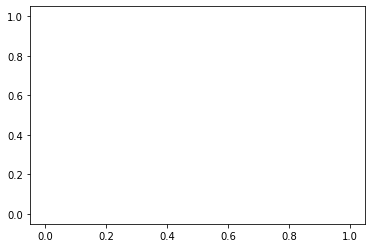

In [132]:
TEMP_0 = DataFrame['TEMP_0'].values.tolist()
plt.plot(TEMP_0)

In [133]:
DataFrame1 = remove_outliers(DataFrame,'TEMP_0',250,-100)

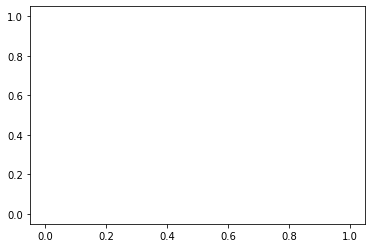

In [134]:
TEMP_0_ro = DataFrame1['TEMP_0'].values.tolist()
plt.plot(TEMP_0_ro)

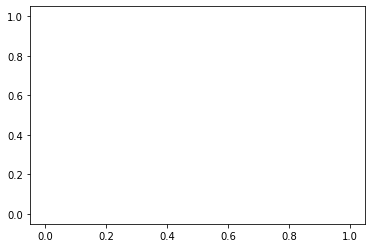

In [135]:
TEMP_1 = DataFrame['TEMP_1'].values.tolist()
plt.plot(TEMP_1)

In [136]:
DataFrame2 = remove_outliers(DataFrame,'TEMP_1',250,-50)

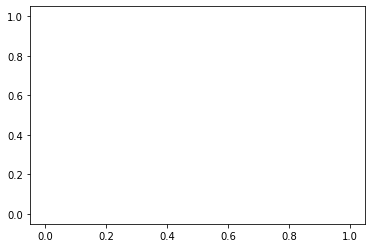

In [137]:
TEMP_1_ro = DataFrame2['TEMP_1'].values.tolist()
plt.plot(TEMP_1_ro)

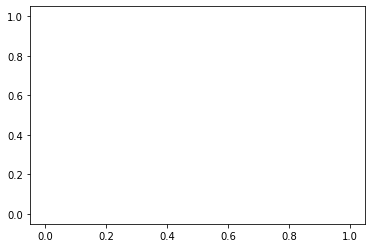

In [138]:
GYRO_0 = DataFrame['GYRO_0'].values.tolist()
plt.plot(GYRO_0)

In [139]:
DataFrame3 = remove_outliers(DataFrame,'GYRO_0',-3,-16)
DataFrame3.shape

(0, 17)

In [140]:
DataFrame.shape

(0, 17)

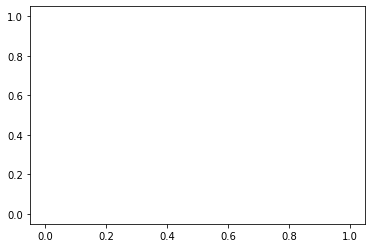

In [141]:
GYRO_0_ro = DataFrame3['GYRO_0'].values.tolist()
plt.plot(GYRO_0_ro)

In [142]:
DataFrame3.shape

(0, 17)

In [143]:
DataFrame.shape

(0, 17)

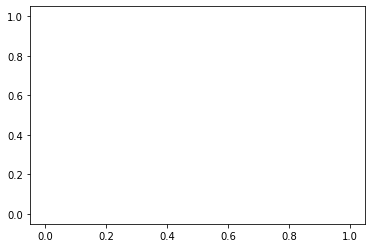

In [144]:
GYRO_1 = DataFrame['GYRO_1'].values.tolist()
plt.plot(GYRO_1)

In [145]:
DataFrame4 = remove_outliers(DataFrame,'GYRO_1',30,22)

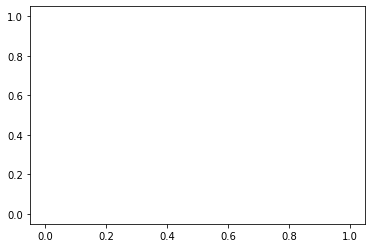

In [146]:
GYRO_1_ro = DataFrame4['GYRO_1'].values.tolist()
plt.plot(GYRO_1_ro)

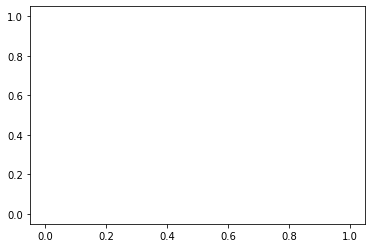

In [147]:
GYRO_2 = DataFrame['GYRO_2'].values.tolist()
plt.plot(GYRO_2)

In [148]:
DataFrame5 = remove_outliers(DataFrame,'GYRO_2',-0.5,-10)

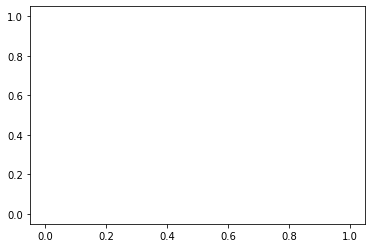

In [149]:
GYRO_2_ro = DataFrame5['GYRO_2'].values.tolist()
plt.plot(GYRO_2_ro)

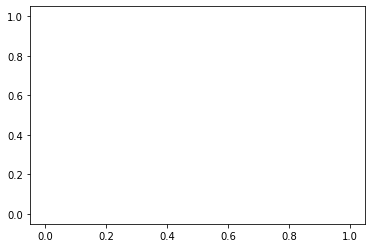

In [150]:
MAG_0 = DataFrame['MAG_0'].values.tolist()
plt.plot(MAG_0)

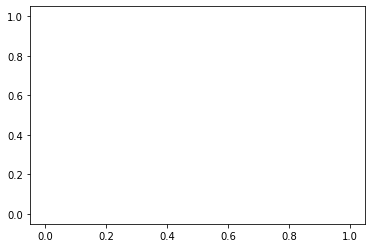

In [151]:
DataFrame6 = remove_outliers(DataFrame,'MAG_0',1000,-1000)
MAG_0_ro = DataFrame6['MAG_0'].values.tolist()
plt.plot(MAG_0_ro)

In [152]:
MAG_0_outliers_COUNT = DataFrame[DataFrame['MAG_0'] > 1000]

In [153]:
MAG_0_outliers_COUNT.shape

(0, 17)

In [154]:
MAG_0_outliers_COUNT = DataFrame[DataFrame['MAG_0'] < -1000]
MAG_0_outliers_COUNT.shape

(0, 17)

In [155]:
DataFrame6.shape

(0, 17)

In [156]:
DataFrame.shape

(0, 17)

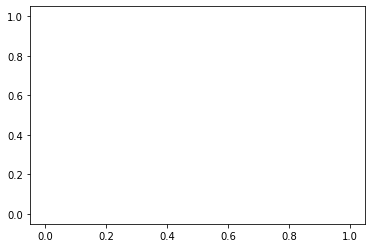

In [157]:
MAG_1 = DataFrame['MAG_1'].values.tolist()
plt.plot(MAG_1)

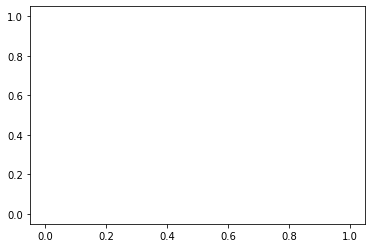

In [158]:
DataFrame7 = remove_outliers(DataFrame,'MAG_1',700,-350)
MAG_1_ro = DataFrame7['MAG_1'].values.tolist()
plt.plot(MAG_1_ro)

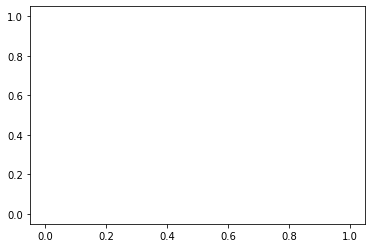

In [159]:
MAG_2 = DataFrame['MAG_2'].values.tolist()
plt.plot(MAG_2)

In [160]:
DataFrame["MAG_2"][DataFrame["MAG_2"]>600]

Series([], Name: MAG_2, dtype: float64)

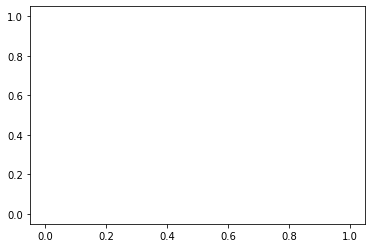

In [161]:
DataFrame8 = remove_outliers(DataFrame,'MAG_2',600,-400)
MAG_2_ro = DataFrame8['MAG_2'].values.tolist()
plt.plot(MAG_2_ro)

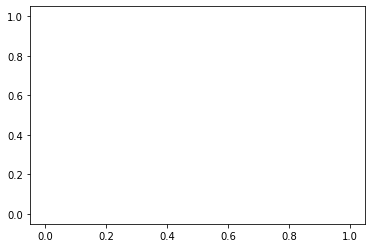

In [162]:
GYRO_TEMP = DataFrame['GYRO_TEMP'].values.tolist()
plt.plot(GYRO_TEMP)

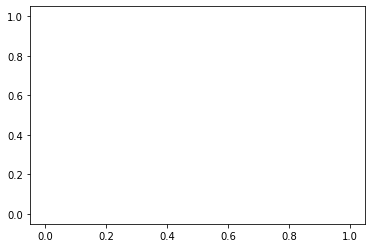

In [163]:
DataFrame9 = remove_outliers(DataFrame,'GYRO_TEMP',30,0)
GYRO_TEMP_ro = DataFrame9['GYRO_TEMP'].values.tolist()
plt.plot(GYRO_TEMP_ro)

In [164]:
# Remove outliers:
# Remove outliers of "TEMP_0" columns
DataFrame_ro1 = remove_outliers(DataFrame,'TEMP_0',250,-100)
# Remove outliers of "TEMP_2" columns
DataFrame_ro2 = remove_outliers(DataFrame_ro1,'TEMP_1',250,-50)
# Remove outliers of "GYRO_0" columns
DataFrame_ro3 = remove_outliers(DataFrame_ro2,'GYRO_0',-3,-16)
# Remove outliers of "GYRO_1" columns
DataFrame_ro4 = remove_outliers(DataFrame_ro3,'GYRO_1',30,22)
# Remove outliers of "GYRO_2" columns
DataFrame_ro5 = remove_outliers(DataFrame_ro4,'GYRO_2',-0.5,-10)
# Remove outliers of "MAG_0" columns
DataFrame_ro6 = remove_outliers(DataFrame_ro5,'MAG_0',1000,-1000)
# Remove outliers of "MAG_1" columns
DataFrame_ro7 = remove_outliers(DataFrame_ro6,'MAG_1',700,-350)
# Remove outliers of "MAG_2" columns
DataFrame_ro8 = remove_outliers(DataFrame_ro7,'MAG_2',600,-400)
# Remove outliers of "MAG_2" columns
DataFrame_ro9 = remove_outliers(DataFrame_ro8,'GYRO_TEMP',30,0)

In [165]:
DataFrame_outliers_removed = DataFrame_ro9.copy()

In [166]:
DataFrame_outliers_removed.shape

(0, 17)

In [167]:
DataFrame.shape

(0, 17)

In [168]:
DataFrame_ro1.shape

(0, 17)

In [169]:
DataFrame_ro2.shape

(0, 17)

In [170]:
DataFrame_ro3.shape

(0, 17)

In [171]:
DataFrame_ro4.shape

(0, 17)

In [172]:
DataFrame_ro5.shape

(0, 17)

In [173]:
DataFrame_ro6.shape

(0, 17)

In [174]:
DataFrame_ro7.shape

(0, 17)

In [175]:
DataFrame_ro8.shape

(0, 17)

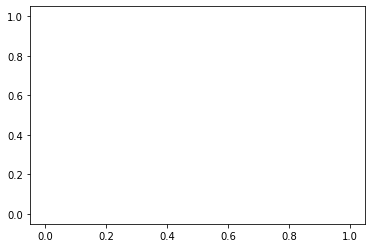

In [176]:
test_TEMP_1_ro = DataFrame_outliers_removed['TEMP_1'].values.tolist()
plt.plot(test_TEMP_1_ro)

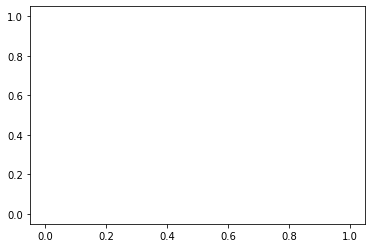

In [177]:
test_TEMP_0_ro = DataFrame_outliers_removed['TEMP_0'].values.tolist()
plt.plot(test_TEMP_0_ro)

In [178]:
print(str(DataFrame.shape[0] - DataFrame_outliers_removed.shape[0]) + " outlier rows are removed")

0 outlier rows are removed


clean the data based on the time

In [179]:
DataFrame_outliers_removed.sort_values(by="CCSDS_SECONDS").head(10)

Empty DataFrame
Columns: [TARGET, PACKET, CCSDS_SEQ_COUNT, CCSDS_SECONDS, CCSDS_SUBSECS, TEMP_0, TEMP_1, MAG_0, MAG_1, MAG_2, GYRO_0, GYRO_1, GYRO_2, GYRO_TEMP, filename, CCSDS_SECONDS_SUBSECS, cdsec]
Index: []

In [180]:
print("There are " + str(dataframe.shape[0]) + " rows of the example dataset.")
print(str(dataframe.shape[0] - dataframe_cleaned.shape[0]) + " rows with NaN values are deleted.")
print(str(dataframe_cleaned.shape[0] - dataframe_cleaned3.shape[0]) + " rows are deleted when deleting duplicated rows based on the column 'CCSDS_SECONDS_SUBSECS'")
print(str(DataFrame.shape[0] - DataFrame_outliers_removed.shape[0]) + " outlier rows are removed")
print(str(dataframe.shape[0] - DataFrame_outliers_removed.shape[0]) + " rows are removed in total after cleaning and removing outliers rows of the example dataset.")
print("There are " + str(DataFrame_outliers_removed.shape[0]) + " rows after cleaning the data and removing the outlier of the example dataset.")


There are 197830 rows of the example dataset.
197830 rows with NaN values are deleted.
0 rows are deleted when deleting duplicated rows based on the column 'CCSDS_SECONDS_SUBSECS'
0 outlier rows are removed
197830 rows are removed in total after cleaning and removing outliers rows of the example dataset.
There are 0 rows after cleaning the data and removing the outlier of the example dataset.


## Data Visualization

In [181]:
start_date_string = vresult.strftime("%Y_%m_%d")
analysis_dir = 'data_updated/analysis'
if not os.path.exists(analysis_dir):
    os.mkdir(analysis_dir)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BB1275CC8>,
      dtype=object)

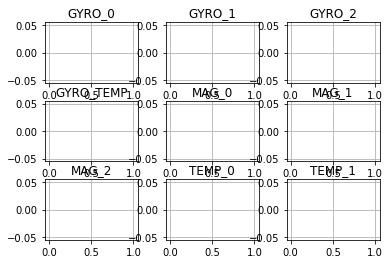

In [182]:
DataFrame_outliers_removed[["TEMP_0","TEMP_1","MAG_0","MAG_1","MAG_2","GYRO_0","GYRO_1","GYRO_2","GYRO_TEMP"]].hist()

In [183]:
corr = DataFrame_outliers_removed.corr(method='pearson')
plt.figure(figsize=(15,8))

import seaborn as sns

hm = sns.heatmap(corr, annot=True)
DataFrame_outliers_removed.columns

fig_heatmap = hm.get_figure()
fig_heatmap.savefig(analysis_dir + "/Heatmap_"+ start_date_string +"_analysis.png")

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1080x576 with 0 Axes>

In [ ]:
dfor2=DataFrame_outliers_removed[["MAG_0","MAG_1","MAG_2"]]

In [ ]:
corr = dfor2.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dfor2.columns

In [ ]:
dfor3=DataFrame_outliers_removed[["GYRO_0","GYRO_1","GYRO_2","GYRO_TEMP"]]

In [ ]:
corr = dfor3.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dfor3.columns

In [ ]:
df0 = DataFrame_outliers_removed.copy()
df0

In [ ]:
df0.sort_values(by='cdsec')

In [ ]:

x = df0['cdsec']
y = df0['TEMP_0']

df0.plot(x='cdsec', y='TEMP_0')

In [ ]:

x = df0['cdsec']
y = df0['TEMP_1']

df0.plot(x='cdsec', y='TEMP_1')

In [ ]:

x = df0['cdsec']
y = df0['GYRO_0']

df0.plot(x='cdsec', y='GYRO_0')

In [ ]:

x = df0['cdsec']
y = df0['GYRO_1']

df0.plot(x='cdsec', y='GYRO_1')

In [ ]:
x = df0['cdsec']
y = df0['GYRO_2']

df0.plot(x='cdsec', y='GYRO_2')

In [ ]:
x = df0['cdsec']
y = df0['GYRO_TEMP']

df0.plot(x='cdsec', y='GYRO_TEMP')

In [ ]:
x = df0['cdsec']
y = df0['MAG_0']

df0.plot(x='cdsec', y='MAG_0')

In [ ]:
x = df0['cdsec']
y = df0['MAG_1']

df0.plot(x='cdsec', y='MAG_1')

In [ ]:
x = df0['cdsec']
y = df0['MAG_2']

df0.plot(x='cdsec', y='MAG_2')

In [ ]:
x = df0['cdsec']
y = df0['GYRO_TEMP']

df0.plot(x='cdsec', y='GYRO_TEMP')

In [ ]:
x = df0['cdsec']
y0 = df0['GYRO_0']
y1 = df0['GYRO_1']
y2 = df0['GYRO_2']
df0.plot(x='cdsec', y='GYRO_0')
df0.plot(x='cdsec', y='GYRO_1')
df0.plot(x='cdsec', y='GYRO_2')

In [ ]:
fig = df0[["cdsec", "GYRO_0", "GYRO_1", "GYRO_2"]].plot(x="cdsec").get_figure()
fig.savefig(analysis_dir + "/Gyro_"+ start_date_string +"_analysis.png")

In [ ]:
fig = df0[["cdsec", "MAG_0", "MAG_1", "MAG_2"]].plot(x="cdsec").get_figure()
fig.savefig(analysis_dir + "/Magnetometer_"+ start_date_string +"_analysis.png")

In [ ]:
fig = df0[["cdsec", "TEMP_1", "TEMP_0"]].plot(x="cdsec").get_figure()
fig.savefig(analysis_dir + "/Temperature_"+ start_date_string +"_analysis.png")

In [ ]:
fig = df0[["cdsec", "GYRO_1", "TEMP_0"]].plot(x="cdsec").get_figure()
fig.savefig(analysis_dir + "/Temperature_GYRO_"+ start_date_string +"_analysis.png")

In [ ]:
df0.to_csv(analysis_dir + "/Preprocessed_SEN_Hk_tlm_t_" + start_date_string+".csv", index = False)